# OutlierRemover Processor Testing

This notebook provides testing of the CIL `OutlierRemover` processor with flower dataset

## 1. Import Libraries

In [4]:
from cil.io import TIFFStackReader
import numpy as np
import matplotlib.pyplot as plt
from cil.framework import ImageData, AcquisitionData, ImageGeometry, AcquisitionGeometry
from cil.processors import Slicer
from OutlierRemover import OutlierRemover
from cil.utilities.display import show2D, show_geometry
import cil


## 2. Load the Flower Reconstruction TIFF Image

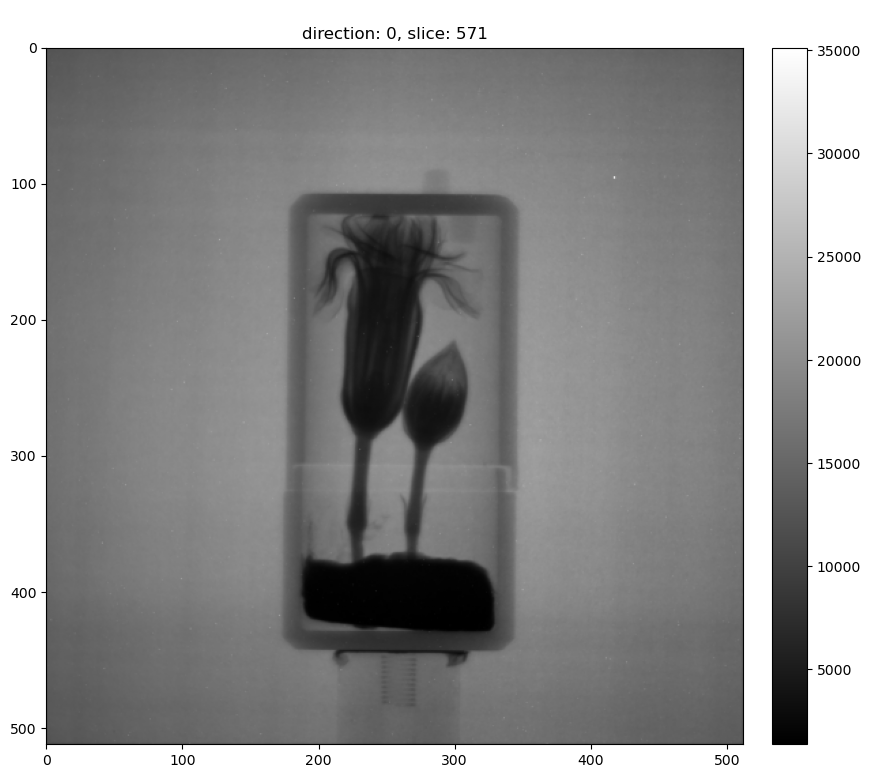

In [3]:

filename = r"C:\Programming\Mantid_Data\mantidimaging-data-main\mantidimaging-data-main\ISIS\IMAT\IMAT00010675\Tomo"
# %load ./snippets/03_exA.py
# create the TIFF reader by passing the directory containing the files
reader = TIFFStackReader(file_name=filename, dtype=np.float32)

# read in file, and return a numpy array containing the data
data_original = reader.read()

# use show2D to visualise the sinogram
show2D(data_original,origin='upper-left')

## 3. Convert to CIL ImageData

In [6]:
# Create ImageGeometry and ImageData
print("Array stored as:",type(data_original))
print("Array shape:\t",data_original.shape)
print("Array contents:\t",data_original.dtype)


Array stored as: <class 'numpy.ndarray'>
Array shape:	 (1143, 512, 512)
Array contents:	 float32


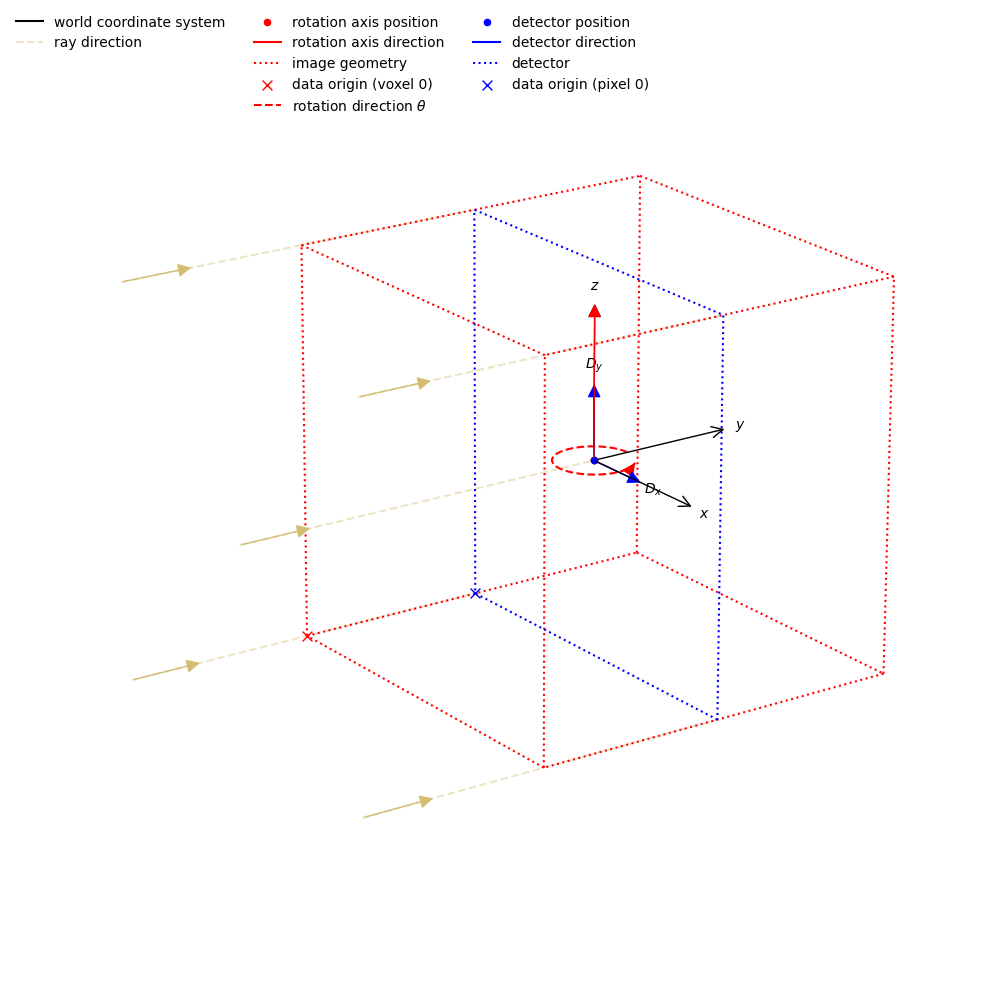

In [7]:
ag = AcquisitionGeometry.create_Parallel3D()\
    .set_panel(num_pixels=[512,512])\
    .set_angles(angles=np.linspace(0,360,1143))

show_geometry(ag)

In [8]:
ig = ag.get_ImageGeometry()


In [9]:
dataContainer = AcquisitionData(data_original, geometry=ag)

In [10]:
roi = {'horizontal':(150,350),'vertical':(100,400)}
processor = Slicer(roi)
processor.set_input(dataContainer)
data_sliced= processor.get_output()

New geometry:  3D Parallel-beam tomography
System configuration:
	Ray direction: [0., 1., 0.]
	Rotation axis position: [0., 0., 0.]
	Rotation axis direction: [0., 0., 1.]
	Detector position: [-6.,  0., -6.]
	Detector direction x: [1., 0., 0.]
	Detector direction y: [0., 0., 1.]
Panel configuration:
	Number of pixels: [200 300]
	Pixel size: [1. 1.]
	Pixel origin: bottom-left
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 1143
	Angles 0-9 in degrees: [0.        , 0.31523642, 0.63047284, 0.9457093 , 1.2609457 , 1.5761821 ,
 1.8914186 , 2.206655  , 2.5218914 , 2.837128  ]
	Angles 1133-1142 in degrees: [357.16287, 357.47812, 357.79333, 358.10858, 358.42383, 358.73904,
 359.0543 , 359.36954, 359.68475, 360.     ]
	Full angular array can be accessed with acquisition_data.geometry.angles
Distances in units: units distance
Shape out:  (1143, 300, 200)
New geometry shape:  (1143, 300, 200)


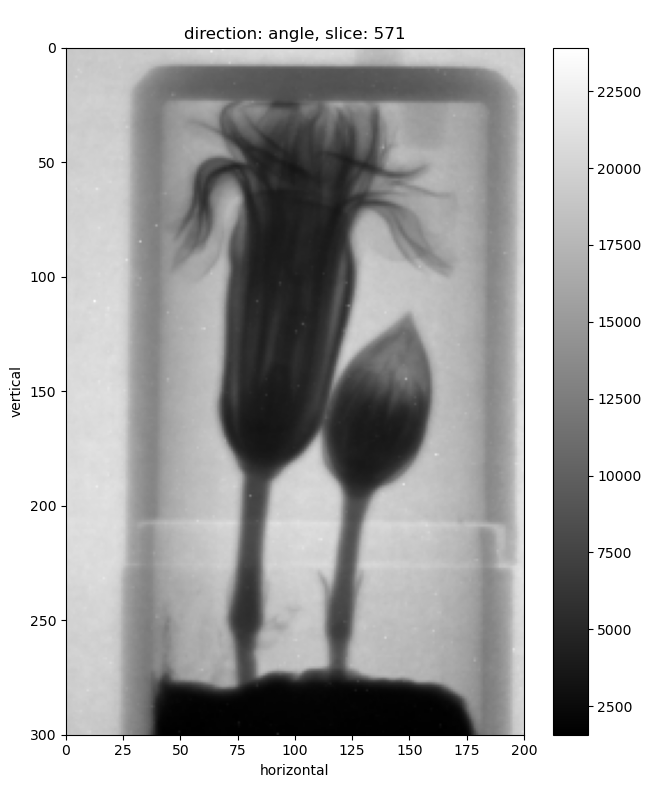

In [11]:
show2D(data_sliced, origin='upper-left')

In [23]:
data_sliced_copy = data_sliced.copy()

In [24]:
bright_outlier_removed_data = OutlierRemover(diff=500, radius=3, mode='bright')(data_sliced)

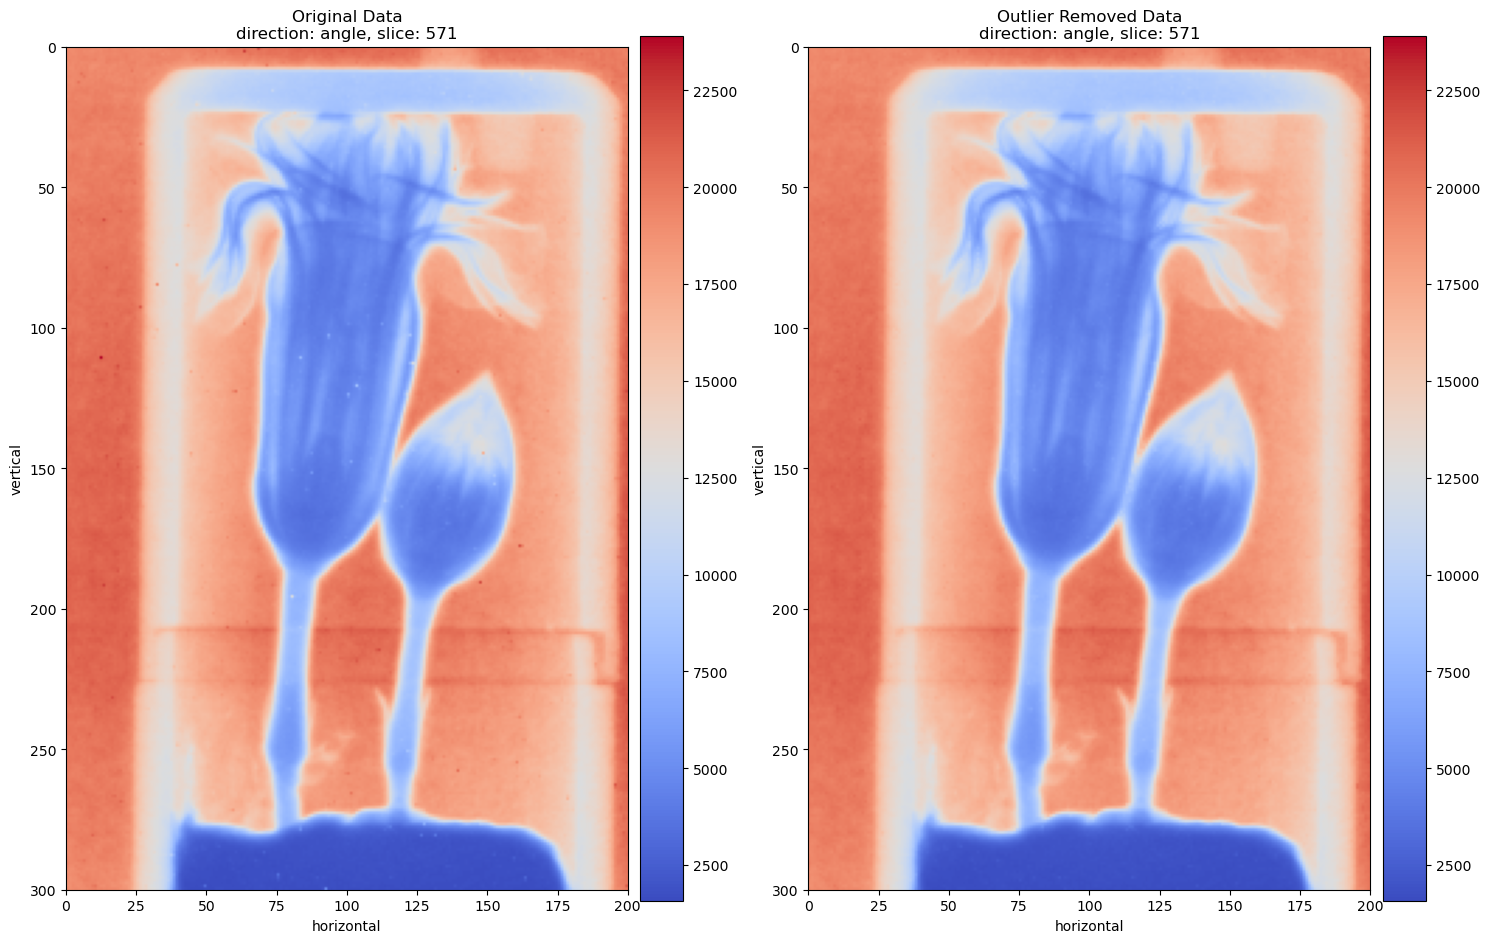

In [25]:
show2D([data_sliced_copy, bright_outlier_removed_data], title=['Original Data', 'Outlier Removed Data'], fix_range=True, cmap ='coolwarm', origin='upper-left')

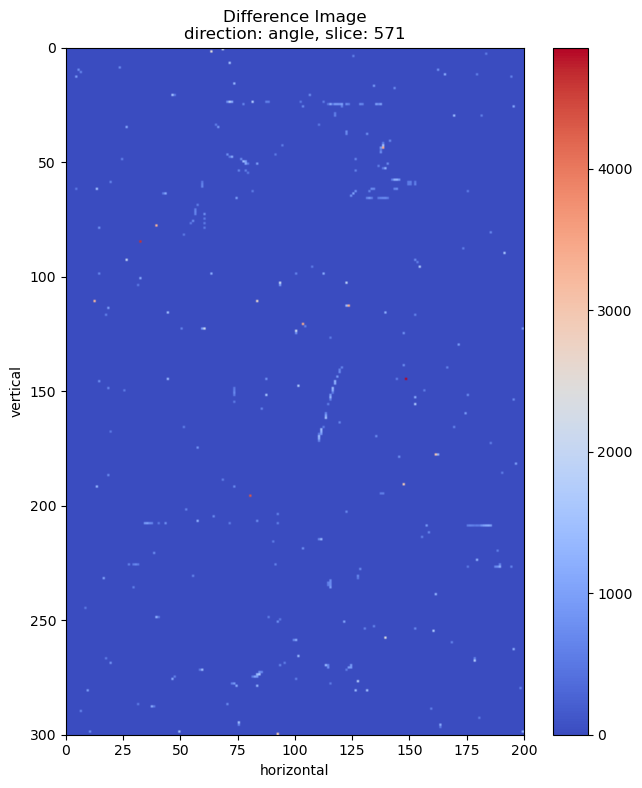

In [26]:
show2D(data_sliced_copy - bright_outlier_removed_data, title='Difference Image', cmap='coolwarm', origin='upper-left')

In [27]:
dark_outlier_removed_data = OutlierRemover(diff=500, radius=3, mode='dark')(bright_outlier_removed_data)

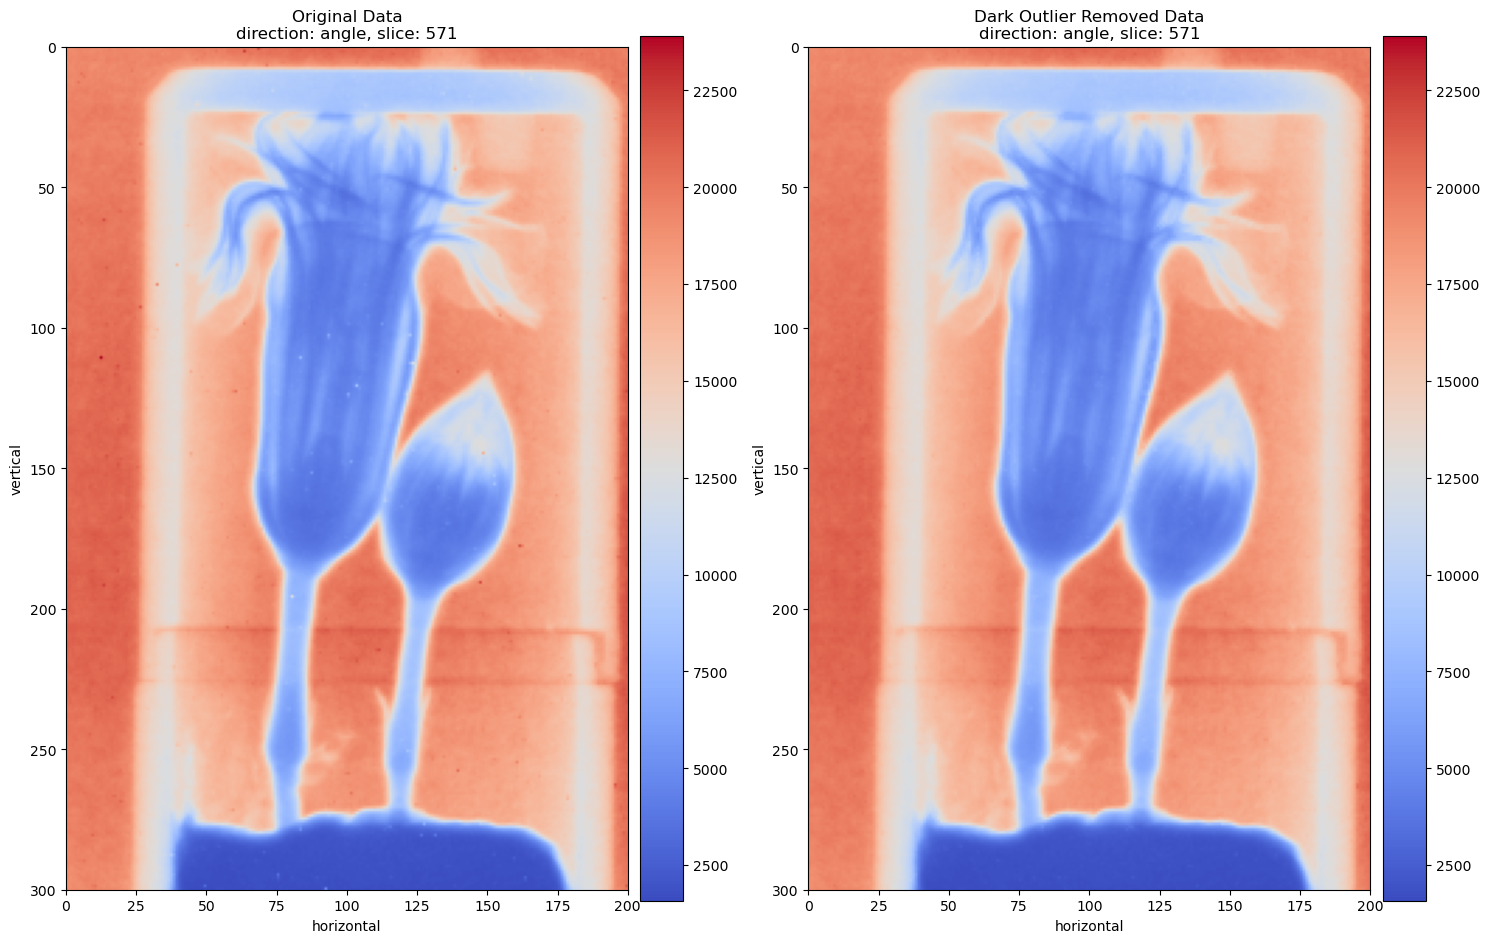

In [28]:
show2D([data_sliced_copy, dark_outlier_removed_data], title=['Original Data', 'Dark Outlier Removed Data'], fix_range=True, cmap ='coolwarm', origin='upper-left')

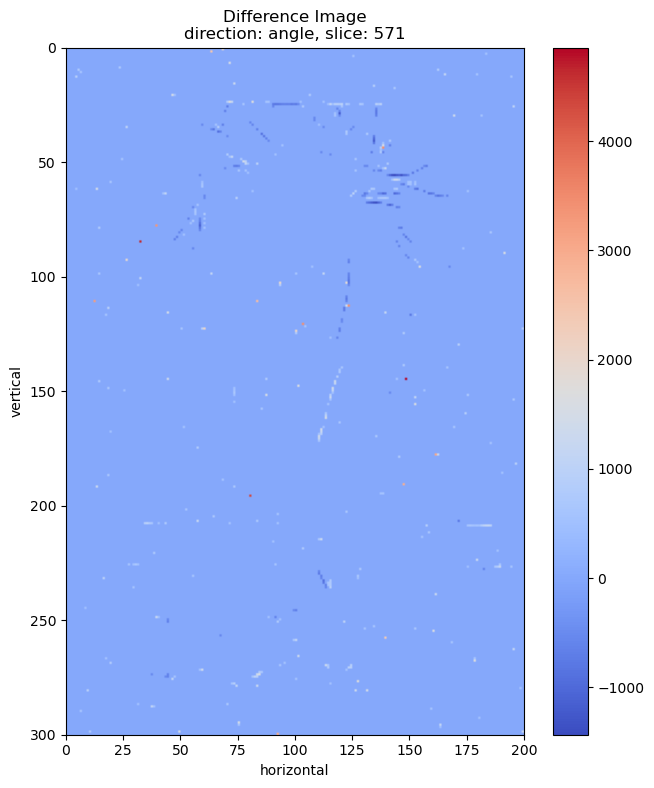

In [29]:
show2D(data_sliced_copy - dark_outlier_removed_data, title='Difference Image', cmap='coolwarm', origin='upper-left')